In [2]:
import time
import sys
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
import multiprocessing
import os
from scipy import sparse
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn import ensemble
import datetime as dt
from datetime import date
import calendar
from calendar import weekday, day_name
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from sklearn.datasets import make_regression

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
df = pd.read_csv('another_all_train_matrix.csv', sep=',')
df

,date,store_nbr,item_nbr,units,date2,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,1,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
1,2012-01-01,1,2,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
2,2012-01-01,1,3,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
3,2012-01-01,1,4,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
4,2012-01-01,1,5,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
5,2012-01-01,1,6,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
6,2012-01-01,1,7,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
7,2012-01-01,1,8,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
8,2012-01-01,1,9,29,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
9,2012-01-01,1,10,0,2012-01-01,Sun,1,1,0,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6


In [3]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'date2', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday',
       'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'sunrise', 'sunset', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [40]:
# 컬럼삭제
df2 = df.drop('units', axis=1)
df2

,date,store_nbr,item_nbr,date2,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,1,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
1,2012-01-01,1,2,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
2,2012-01-01,1,3,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
3,2012-01-01,1,4,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
4,2012-01-01,1,5,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
5,2012-01-01,1,6,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
6,2012-01-01,1,7,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
7,2012-01-01,1,8,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
8,2012-01-01,1,9,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
9,2012-01-01,1,10,2012-01-01,Sun,1,1,0,1,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6


In [ ]:
sns.pairplot(df2)
plt.show()

In [5]:
df2.corr()

,store_nbr,item_nbr,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,station_nbr,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
store_nbr,1.000000e+00,-1.401249e-17,-6.258057e-04,1.251055e-03,8.778269e-04,9.600506e-04,1.945164e-03,4.699957e-03,0.010445,2.199581e-01,...,-8.109427e-03,-1.282981e-02,1.208974e-03,8.863181e-03,2.990871e-03,-1.606988e-01,-1.253231e-02,-4.254916e-02,-4.822940e-04,-3.421514e-02
item_nbr,-1.401249e-17,1.000000e+00,-2.028293e-17,-4.492928e-22,1.335209e-20,-7.673812e-23,-6.247079e-18,-4.050043e-18,0.000000,-4.223035e-18,...,3.331734e-18,-6.822127e-18,9.428062e-20,1.073850e-18,1.427036e-18,1.054645e-17,-6.983879e-17,5.589520e-19,1.713125e-18,9.729277e-18
is_weekend,-6.258057e-04,-2.028293e-17,1.000000e+00,-2.077088e-02,-1.227244e-01,1.721133e-01,-6.552120e-03,4.625295e-03,-0.004640,-9.433487e-04,...,-9.022808e-03,-6.878015e-04,2.678189e-03,-6.426526e-04,-6.262890e-03,-2.168091e-05,-8.799345e-03,6.839583e-03,1.424106e-02,-2.721172e-03
is_holiday,1.251055e-03,-4.492928e-22,-2.077088e-02,1.000000e+00,8.642621e-01,4.846742e-01,-6.953135e-03,1.586986e-02,-0.017493,-1.276713e-04,...,-5.922860e-02,7.187529e-02,-7.558917e-02,-9.676165e-03,-1.240848e-02,3.255783e-03,5.622137e-02,2.098239e-03,5.425928e-02,1.564153e-02
is_holiday_weekday,8.778269e-04,1.335209e-20,-1.227244e-01,8.642621e-01,1.000000e+00,-2.112250e-02,4.732023e-03,4.033179e-02,-0.018474,7.345354e-05,...,-5.709114e-02,1.103789e-01,-1.107724e-01,-7.349692e-03,-1.366969e-02,2.584671e-03,5.521164e-02,-7.667528e-03,5.625093e-02,3.260841e-03
is_holiday_weekend,9.600506e-04,-7.673812e-23,1.721133e-01,4.846742e-01,-2.112250e-02,1.000000e+00,-2.204719e-02,-3.858862e-02,-0.002645,-3.814638e-04,...,-1.844391e-02,-4.907860e-02,4.238160e-02,-6.451291e-03,-8.923835e-04,1.976493e-03,1.573527e-02,1.750256e-02,1.002856e-02,2.541697e-02
day,1.945164e-03,-6.247079e-18,-6.552120e-03,-6.953135e-03,4.732023e-03,-2.204719e-02,1.000000e+00,9.917094e-03,0.011513,-1.669801e-03,...,1.908780e-02,-1.416057e-02,-4.523067e-03,-1.219490e-02,1.527768e-02,-2.220830e-03,-3.899869e-02,3.674817e-02,-2.230731e-02,3.820950e-02
month,4.699957e-03,-4.050043e-18,4.625295e-03,1.586986e-02,4.033179e-02,-3.858862e-02,9.917094e-03,1.000000e+00,-0.129003,-2.007870e-03,...,2.085473e-01,-1.031710e-01,-8.976537e-02,-4.827416e-02,-7.523544e-03,1.767032e-03,-5.398195e-03,-1.142862e-01,-6.568392e-02,-1.568694e-01
year,1.044465e-02,0.000000e+00,-4.640064e-03,-1.749299e-02,-1.847357e-02,-2.644617e-03,1.151275e-02,-1.290033e-01,1.000000,-2.065613e-03,...,-2.447560e-02,-5.665524e-02,3.803824e-02,1.065636e-02,-5.082768e-02,-1.929748e-02,3.294273e-02,3.488956e-02,1.179283e-02,5.440598e-02
station_nbr,2.199581e-01,-4.223035e-18,-9.433487e-04,-1.276713e-04,7.345354e-05,-3.814638e-04,-1.669801e-03,-2.007870e-03,-0.002066,1.000000e+00,...,-4.476846e-02,-1.358586e-01,-1.108661e-01,2.360724e-02,-3.292301e-03,-1.077629e-01,1.139895e-02,-9.300305e-02,-3.587676e-02,-8.025447e-02


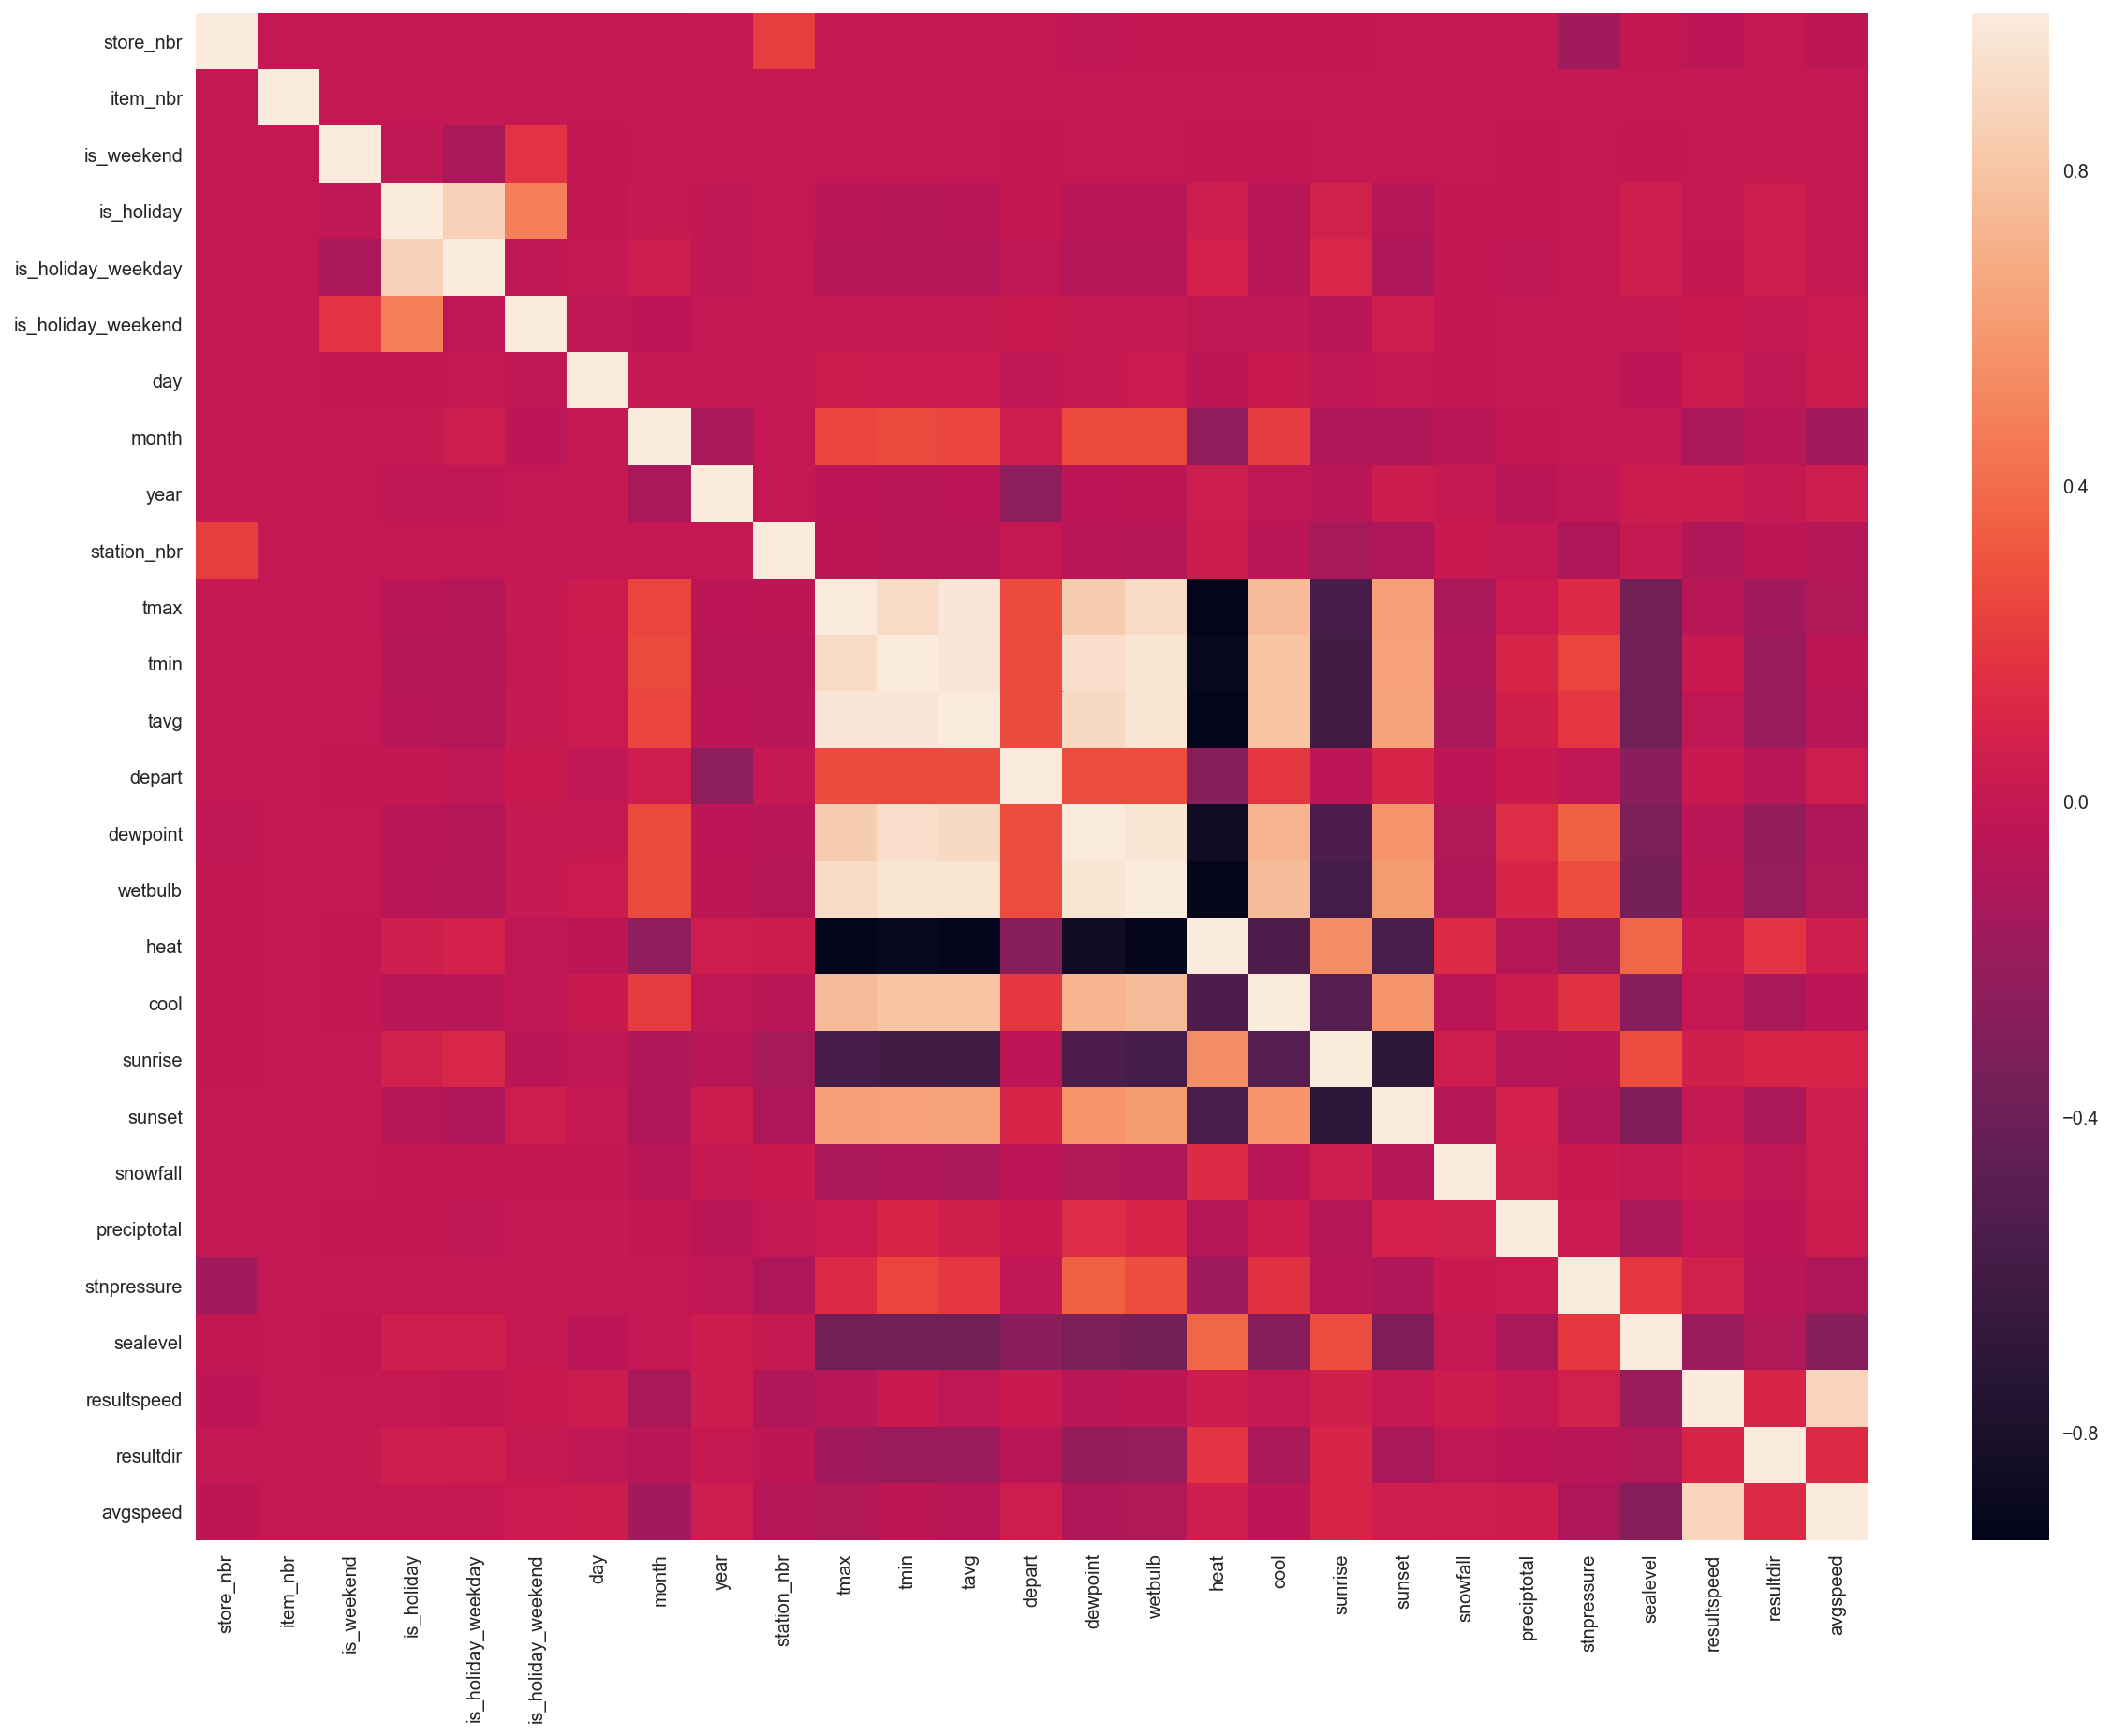

In [8]:
plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr())
plt.show()

In [7]:
model = sm.OLS.from_formula("units ~ date + store_nbr + item_nbr + day + year + "
                                 "month + weekday + is_weekend + is_holiday + is_holiday_weekday + "
                                 "is_holiday_weekend + station_nbr + "
                                 "scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) + scale(sunrise) + "
                                 "scale(sunset) + scale(snowfall) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) + scale(resultdir)"
                                 "+ avgspeed", data=df)
result = model.fit()
print(result.summary())

KeyboardInterrupt: 

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns
vif

TypeError: '>=' not supported between instances of 'str' and 'float'

In [ ]:
model2 = sm.OLS.from_formula("units ~ date + store_nbr + item_nbr + day + year + "
                                 "month + weekday + is_weekend + is_holiday + is_holiday_weekday + "
                                 "is_holiday_weekend + holiday_name + around_BlackFriday + station_nbr + "
                                 "scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) + scale(sunrise) + "
                                 "scale(sunset) + scale(snowfall) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) + scale(resultdir)"
                                 "+ avgspeed", data=df)
result2 = model2.fit()
print(result2.summary())

In [13]:
df2.columns

Index(['date', 'store_nbr', 'item_nbr', 'date2', 'weekday', 'is_weekend',
       'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend', 'day',
       'month', 'year', 'holiday_name', 'around_BlackFriday', 'station_nbr',
       'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'snowfall', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [14]:
df2.corr().columns

Index(['store_nbr', 'item_nbr', 'is_weekend', 'is_holiday',
       'is_holiday_weekday', 'is_holiday_weekend', 'day', 'month', 'year',
       'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'sunrise', 'sunset', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [4]:
lc = ['store_nbr', 'item_nbr', 'is_weekend', 'is_holiday',
       'is_holiday_weekday', 'is_holiday_weekend', 'day', 'month', 'year',
       'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'sunrise', 'sunset', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
df3 = pd.DataFrame(df, columns=lc)
df3

,store_nbr,item_nbr,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,station_nbr,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,1,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
1,1,2,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
2,1,3,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
3,1,4,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
4,1,5,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
5,1,6,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
6,1,7,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
7,1,8,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
8,1,9,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
9,1,10,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6


In [ ]:
sns.pairplot(df3)
plt.show()

In [18]:
df3.corr()

,store_nbr,item_nbr,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,station_nbr,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
store_nbr,1.000000e+00,-1.401249e-17,-6.258057e-04,1.251055e-03,8.778269e-04,9.600506e-04,1.945164e-03,4.699957e-03,0.010445,2.199581e-01,...,-8.109427e-03,-1.282981e-02,1.208974e-03,8.863181e-03,2.990871e-03,-1.606988e-01,-1.253231e-02,-4.254916e-02,-4.822940e-04,-3.421514e-02
item_nbr,-1.401249e-17,1.000000e+00,-2.028293e-17,-4.492928e-22,1.335209e-20,-7.673812e-23,-6.247079e-18,-4.050043e-18,0.000000,-4.223035e-18,...,3.331734e-18,-6.822127e-18,9.428062e-20,1.073850e-18,1.427036e-18,1.054645e-17,-6.983879e-17,5.589520e-19,1.713125e-18,9.729277e-18
is_weekend,-6.258057e-04,-2.028293e-17,1.000000e+00,-2.077088e-02,-1.227244e-01,1.721133e-01,-6.552120e-03,4.625295e-03,-0.004640,-9.433487e-04,...,-9.022808e-03,-6.878015e-04,2.678189e-03,-6.426526e-04,-6.262890e-03,-2.168091e-05,-8.799345e-03,6.839583e-03,1.424106e-02,-2.721172e-03
is_holiday,1.251055e-03,-4.492928e-22,-2.077088e-02,1.000000e+00,8.642621e-01,4.846742e-01,-6.953135e-03,1.586986e-02,-0.017493,-1.276713e-04,...,-5.922860e-02,7.187529e-02,-7.558917e-02,-9.676165e-03,-1.240848e-02,3.255783e-03,5.622137e-02,2.098239e-03,5.425928e-02,1.564153e-02
is_holiday_weekday,8.778269e-04,1.335209e-20,-1.227244e-01,8.642621e-01,1.000000e+00,-2.112250e-02,4.732023e-03,4.033179e-02,-0.018474,7.345354e-05,...,-5.709114e-02,1.103789e-01,-1.107724e-01,-7.349692e-03,-1.366969e-02,2.584671e-03,5.521164e-02,-7.667528e-03,5.625093e-02,3.260841e-03
is_holiday_weekend,9.600506e-04,-7.673812e-23,1.721133e-01,4.846742e-01,-2.112250e-02,1.000000e+00,-2.204719e-02,-3.858862e-02,-0.002645,-3.814638e-04,...,-1.844391e-02,-4.907860e-02,4.238160e-02,-6.451291e-03,-8.923835e-04,1.976493e-03,1.573527e-02,1.750256e-02,1.002856e-02,2.541697e-02
day,1.945164e-03,-6.247079e-18,-6.552120e-03,-6.953135e-03,4.732023e-03,-2.204719e-02,1.000000e+00,9.917094e-03,0.011513,-1.669801e-03,...,1.908780e-02,-1.416057e-02,-4.523067e-03,-1.219490e-02,1.527768e-02,-2.220830e-03,-3.899869e-02,3.674817e-02,-2.230731e-02,3.820950e-02
month,4.699957e-03,-4.050043e-18,4.625295e-03,1.586986e-02,4.033179e-02,-3.858862e-02,9.917094e-03,1.000000e+00,-0.129003,-2.007870e-03,...,2.085473e-01,-1.031710e-01,-8.976537e-02,-4.827416e-02,-7.523544e-03,1.767032e-03,-5.398195e-03,-1.142862e-01,-6.568392e-02,-1.568694e-01
year,1.044465e-02,0.000000e+00,-4.640064e-03,-1.749299e-02,-1.847357e-02,-2.644617e-03,1.151275e-02,-1.290033e-01,1.000000,-2.065613e-03,...,-2.447560e-02,-5.665524e-02,3.803824e-02,1.065636e-02,-5.082768e-02,-1.929748e-02,3.294273e-02,3.488956e-02,1.179283e-02,5.440598e-02
station_nbr,2.199581e-01,-4.223035e-18,-9.433487e-04,-1.276713e-04,7.345354e-05,-3.814638e-04,-1.669801e-03,-2.007870e-03,-0.002066,1.000000e+00,...,-4.476846e-02,-1.358586e-01,-1.108661e-01,2.360724e-02,-3.292301e-03,-1.077629e-01,1.139895e-02,-9.300305e-02,-3.587676e-02,-8.025447e-02


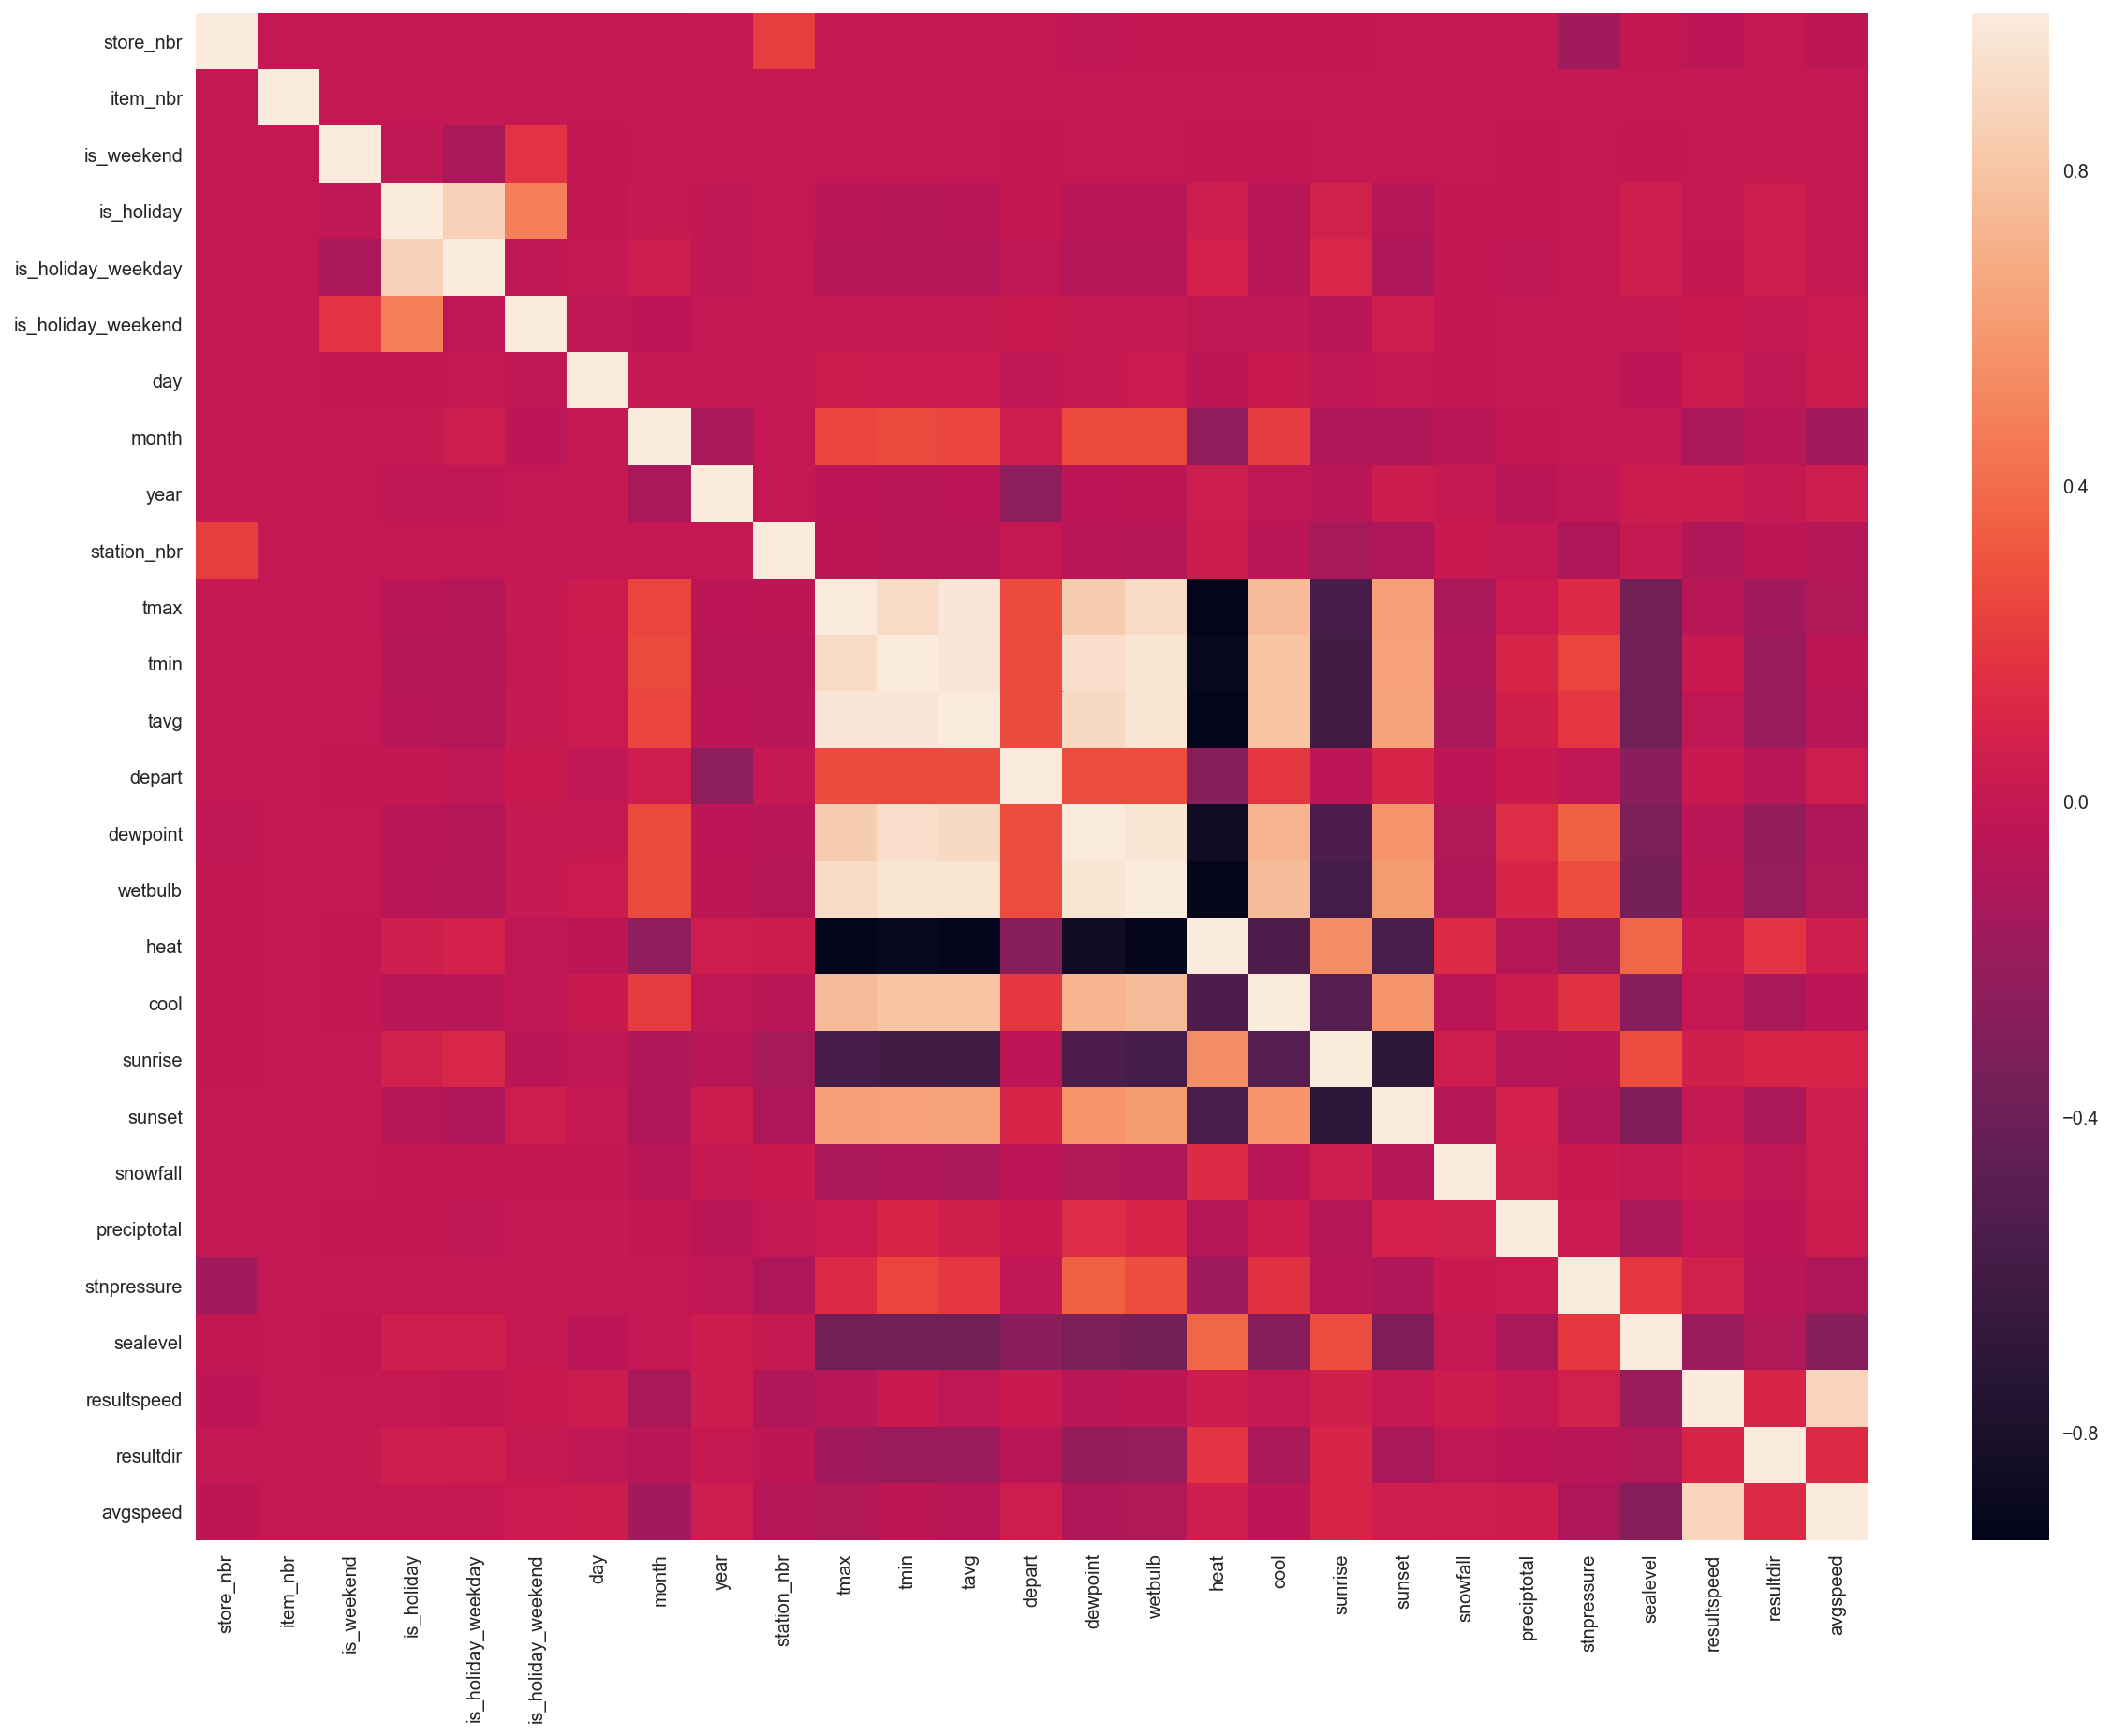

In [19]:
plt.subplots(figsize=(20,15))
sns.heatmap(df3.corr())
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif["features"] = df3.columns
vif

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.090499e+00,store_nbr
1,1.000000e+00,item_nbr
2,1.048848e+00,is_weekend
3,inf,is_holiday
4,inf,is_holiday_weekday
5,inf,is_holiday_weekend
6,1.009028e+00,day
7,1.431815e+00,month
8,1.115194e+00,year
9,1.251109e+00,station_nbr


제거 : tavg, heat, cool, 

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
   
    # 카테고리변수 제거 
    ls = []
    for column in X.columns:
        try:
            if X[column].dtype == 'object' or X[column].name == 'units':
                continue
        except:
            continue
        ls.append(column)
    
    X = pd.DataFrame(X, columns=ls)
    
    # 다중공선성 제거
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            #print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    #print('Remaining variables:')
    #print(X.columns[variables])
    return X[cols[variables]]

In [97]:
calculate_vif_(df2)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [109]:
ls = []
for column in df2.columns:
    try:
        if df2[column].dtype == 'object' or df2[column].name == 'units':
            continue
    except:
        continue
    ls.append(column)
    
df2 = pd.DataFrame(df2, columns=ls)
df2

,store_nbr,item_nbr,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,station_nbr,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,1,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
1,1,2,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
2,1,3,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
3,1,4,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
4,1,5,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
5,1,6,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
6,1,7,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
7,1,8,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
8,1,9,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6
9,1,10,1,1,0,1,1,1,2012,1,...,0.0,716.0,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 32 columns):
date                  object
store_nbr             int64
item_nbr              int64
date2                 object
weekday               object
is_weekend            int64
is_holiday            int64
is_holiday_weekday    int64
is_holiday_weekend    int64
day                   int64
month                 int64
year                  int64
holiday_name          object
around_BlackFriday    object
station_nbr           int64
tmax                  float64
tmin                  float64
tavg                  float64
depart                float64
dewpoint              float64
wetbulb               float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
snowfall              float64
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir   

In [79]:
df2['date'].dtype != 'object'

False

In [105]:
df['units'].name == 'units'

True

In [ ]:
try:
    if 
except:
    print("except")

In [ ]:
# 데이터가 너무 많아서 예시로 확인...

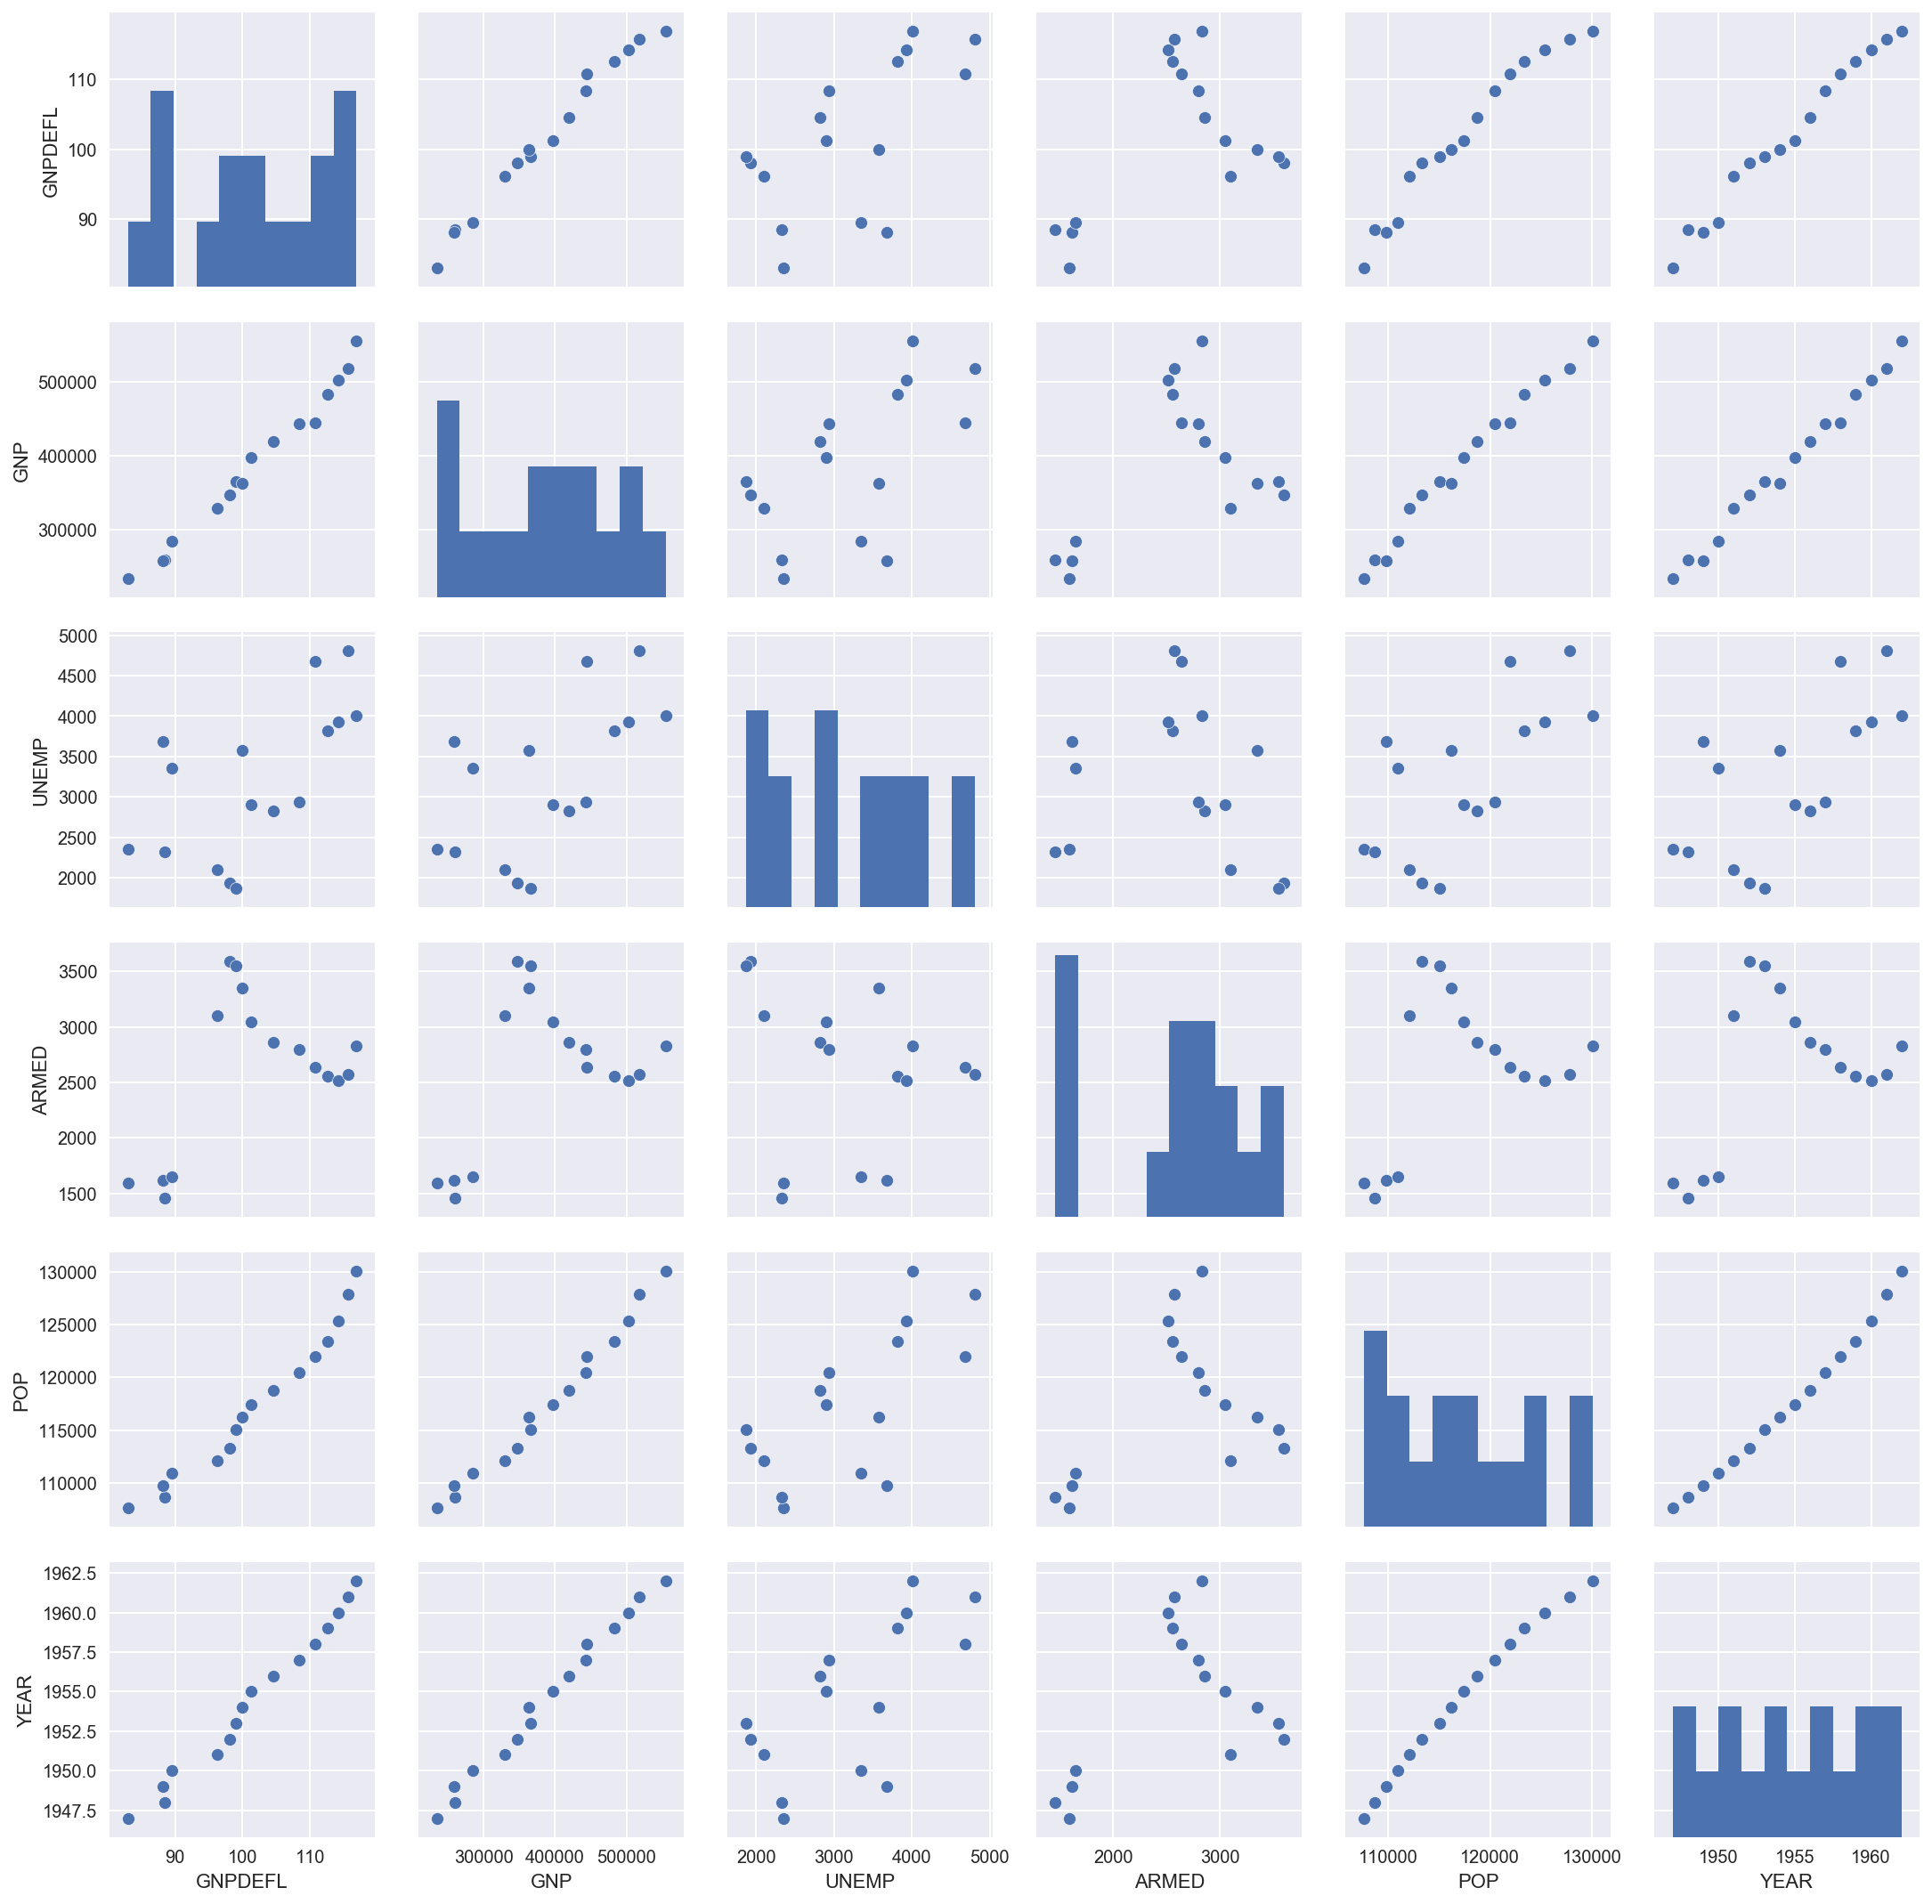

In [9]:
from statsmodels.datasets.longley import load_pandas
dfy = load_pandas().endog
dfX0 = load_pandas().exog
df = pd.concat([dfy, dfX0], axis=1)
sns.pairplot(dfX0)
plt.show()

In [11]:
dfX0.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


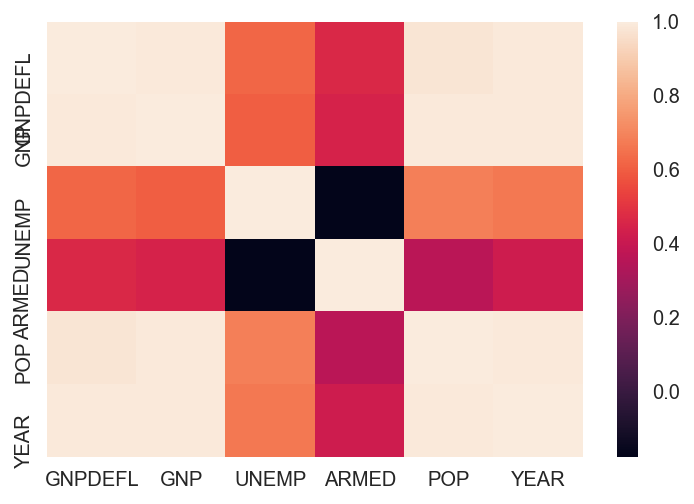

In [10]:
sns.heatmap(dfX0.corr())
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [15]:
df

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,63639.0,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,64989.0,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,63761.0,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,66019.0,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,67857.0,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


In [16]:
df2 = df.drop('TOTEMP', axis=1)
df2

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


In [36]:
# 다중공선성 제거 함수(종속변수(units)가 없는 데이터프레임을 X에 넣어야하고, 카테고리변수는 빼야함.)
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [37]:
calculate_vif_(df2)

dropping 'POP' at index: 4
dropping 'GNPDEFL' at index: 0
Remaining variables:
Index(['GNP', 'UNEMP', 'ARMED', 'YEAR'], dtype='object')


,GNP,UNEMP,ARMED,YEAR
0,234289.0,2356.0,1590.0,1947.0
1,259426.0,2325.0,1456.0,1948.0
2,258054.0,3682.0,1616.0,1949.0
3,284599.0,3351.0,1650.0,1950.0
4,328975.0,2099.0,3099.0,1951.0
5,346999.0,1932.0,3594.0,1952.0
6,365385.0,1870.0,3547.0,1953.0
7,363112.0,3578.0,3350.0,1954.0
8,397469.0,2904.0,3048.0,1955.0
9,419180.0,2822.0,2857.0,1956.0
